In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
# Importing the dataset
dataset = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/5/50_Startups.csv')

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


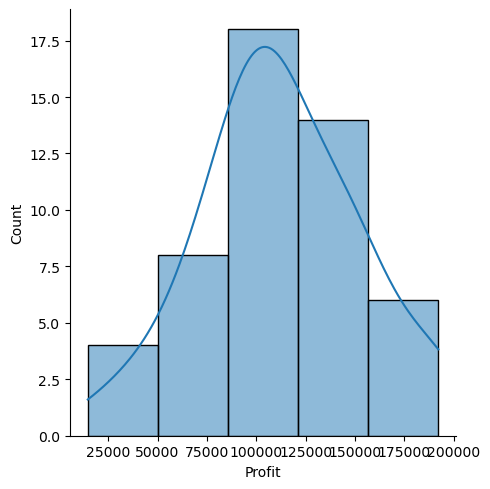

In [5]:
## EDA on Dataset -

#Histgram on Profit
sns.displot(dataset['Profit'],bins=5,kde=True)

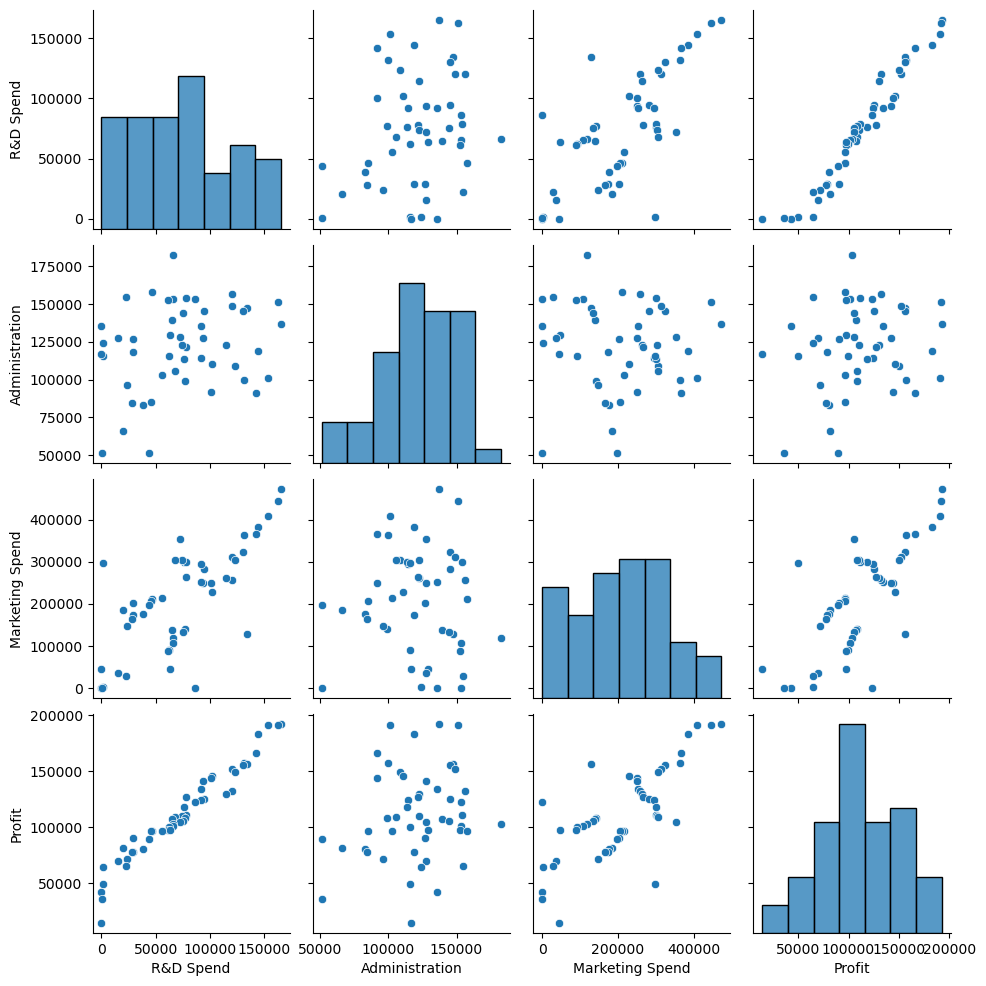

In [6]:
#Correlation  chart on different variables for comparision 
sns.pairplot(dataset)

In [7]:
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 

<Axes: xlabel='State', ylabel='Profit'>

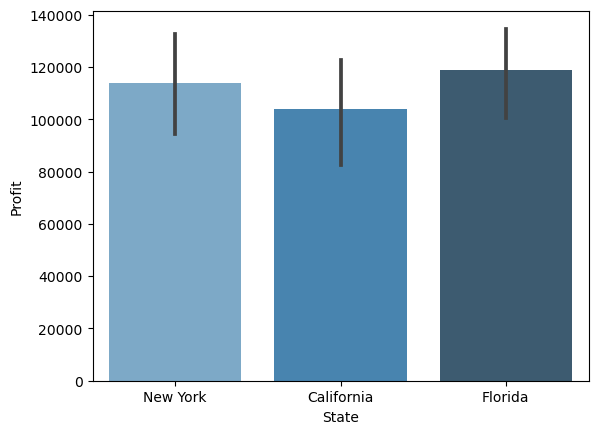

In [8]:
# profit split in State level 
sns.barplot(x='State',y='Profit',data=dataset, palette="Blues_d")

In [9]:
#Looks Florida has the maximum Profit

/var/folders/c1/y9rtpw857h729s9ssm0kwlmw0000gn/T/ipykernel_31834/4084863127.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

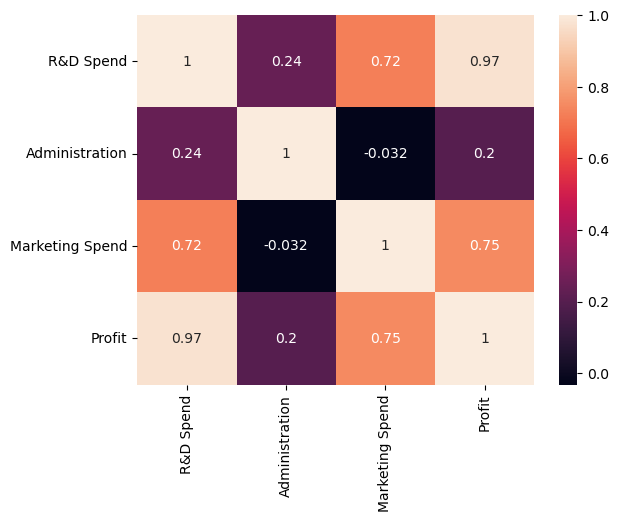

In [10]:
sns.heatmap(dataset.corr(), annot=True)
#gives positive & negative relation between categories

In [43]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [44]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [126]:
# Encode the categorical variable 'State'
label_encoder = LabelEncoder()
X[:, 3] = label_encoder.fit_transform(X[:, 3])


In [47]:
# Apply one-hot encoding to the 'State' column
from sklearn.compose import ColumnTransformer


In [48]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])], # The column numbers to be transformed (here is [3] )
    remainder='passthrough' # Leave the rest of the columns untouched
)

X = np.array(ct.fit_transform(X))


In [49]:
# Avoiding the dummy variable trap by removing one column of the encoded 'State' variable
X = X[:, 1:]

In [149]:
# Reshape X and y to 2D arrays
#X= X.reshape(-1, X.shape[1])
#y = y.reshape(-1, 1)


In [150]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [151]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [152]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error, r2_score

# Create an empty dictionary to store R^2 values for each model
r2_scores = {}

In [154]:
r2_scores['Linear Regression'] = r2_score(y_test, y_pred)
r2_scores

{'Linear Regression': 0.9059212885660157}

In [155]:
mse = mean_squared_error(y_test, y_pred_poly)
mse

94427245.62894012

In [156]:
print('Coefficients: \n', regressor.coef_) 
regressor.score(X_train, y_train)

Coefficients: 
 [[ 6.68771387e+02  5.14208890e+01  8.00958286e-01 -1.11125888e+02
   3.14030703e-02]]


0.9532845577983178

In [169]:
# Calculate the residuals
residuals = y_test - y_pred

# Residual analysis
print("Residual Analysis:")
print("Mean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

Residual Analysis:
Mean of residuals: 1930.6310160673443
Standard deviation of residuals: 8512.15946177169
Root Mean Squared Error (RMSE): 8728.355791489626


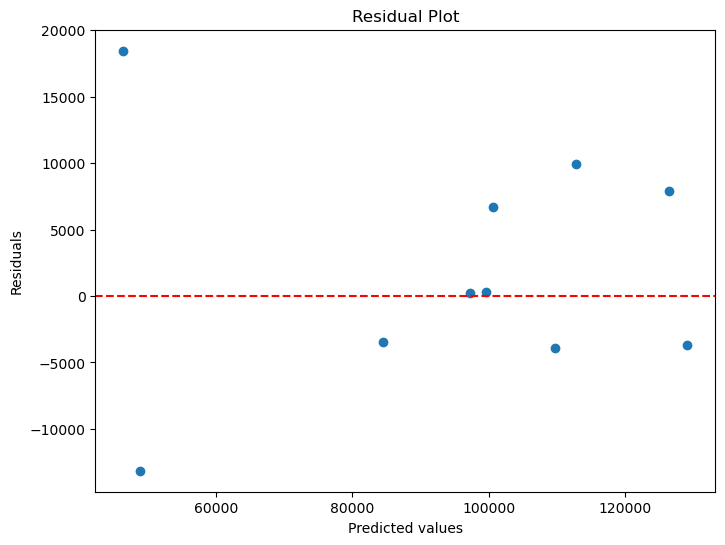

In [170]:
# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
#There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance

In [166]:
# Model 2: Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred_poly = lin_reg_2.predict(poly_reg.transform(X_test))
r2_scores['Polynomial Regression'] = r2_score(y_test, y_pred_poly)
r2_scores


{'Linear Regression': 0.9059212885660157,
 'Polynomial Regression': 0.8833932206845505}

In [171]:
# Calculate the residuals
residuals = y_test - y_pred_poly

# Residual analysis
print("Residual Analysis:")
print("Mean of residuals:", np.mean(residuals))
print("Standard deviation of residuals:", np.std(residuals))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

Residual Analysis:
Mean of residuals: 4029.341804441056
Standard deviation of residuals: 8842.604268648678
Root Mean Squared Error (RMSE): 8728.355791489626


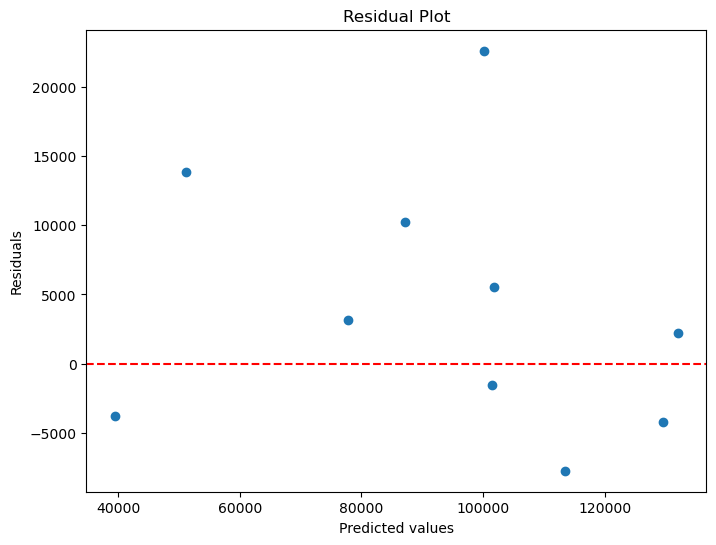

In [172]:
# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [167]:

df_r2 = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R-squared'])


In [168]:

print(df_r2)

                   Model  R-squared
0      Linear Regression   0.905921
1  Polynomial Regression   0.883393


In [ ]:
#We see that r2 score of 1st model is high ,Hence we consider "Linear Regression" our final model